#  Data Exploration & Understanding  

## Introduction  
This dataset contains credit card transactions made by European cardholders in September 2013.
The dataset consists of **284,807 transactions**, out of which **only 0.172% (492 transactions) are fraudulent**. 
This extreme class imbalance makes it a challenging problem for machine learning models.  

##  Dataset Overview  
- The dataset has **31 features**:  
  - **V1 to V28**: Anonymized principal components obtained from PCA transformation.  
  - **Time**: Seconds elapsed between the first transaction and the current one.  
  - **Amount**: The transaction amount.  
  - **Class**: The target variable (0 = Legitimate, 1 = Fraudulent).  

## Key Challenges  
1. **Imbalanced Data**: Fraud cases are extremely rare, requiring specialized handling techniques like resampling.  
2. **Missing Interpretability**: Features **V1-V28** are anonymized, making it difficult to extract domain-specific insights.  
3. **Outliers**: Fraudulent transactions might exhibit extreme values compared to normal transactions.  
4. **Missing Values**: Need to check if any columns contain missing data.  

##  Initial Steps  
To gain insights into the dataset, we will:  
 Check for missing values.  
 Analyze data distribution (fraud vs. non-fraud).  
 Identify potential outliers.  
 Examine feature correlations.  

Let's dive into the analysis!


In [3]:
#lets start with data overview and some statistics and informations 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
# Load the dataset
df = pd.read_csv("/kaggle/input/creditcard-fraud-predictor/creditcard.csv")

# Display the first five rows
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check for missing values
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [7]:
# Show basic statistics for numerical features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.369007e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.500885e-15,-5.620335e-16,1.149614e-16,-2.426963e-15,...,1.596686e-16,-3.576577e-16,2.650499e-16,4.472317e-15,5.109395e-16,1.686100e-15,-3.662399e-16,-1.225457e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
# Check the distribution of the target variable (Class) to see if the dataset are impalanced
print(df["Class"].value_counts(normalize=True) * 100)  # Percentage format

Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


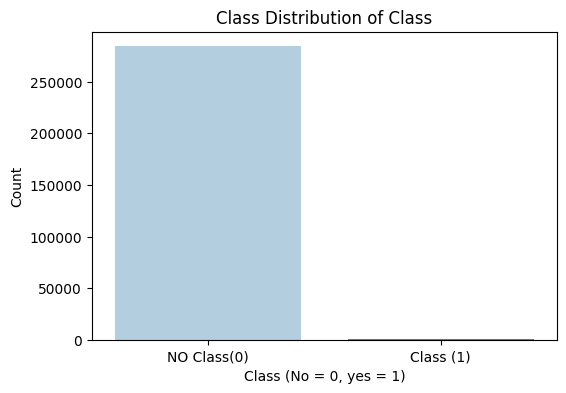

In [16]:
#lets plot this imbalanced distribution 
plt.figure(figsize=(6, 4))
sns.barplot(x=df["Class"].value_counts().index, y=df["Class"].value_counts(), palette="Blues")
plt.title("Class Distribution of Class")
plt.xlabel("Class (No = 0, yes = 1)")
plt.ylabel("Count")
plt.xticks([0, 1], ["NO Class(0)", "Class (1)"])
plt.show()


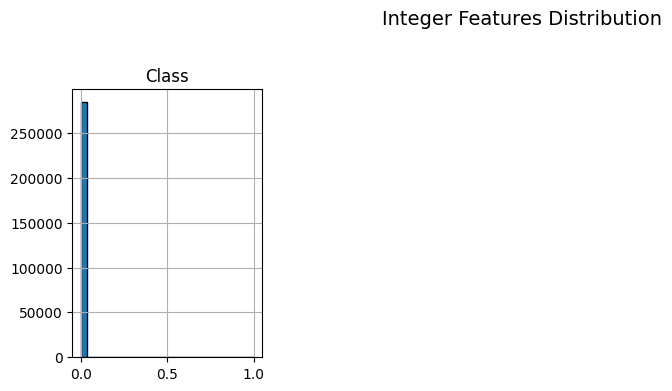

In [17]:
#lets make some visualizations 
#Here is the visualization for the integer features.
# Visualizing only the integer features
int_columns = df.select_dtypes(include=['int64']).columns.tolist()

# Plot integer features
df[int_columns].hist(bins=30, edgecolor='black', layout=(2, 4), figsize=(12, 8))
plt.suptitle("Integer Features Distribution", fontsize=14)
plt.show()



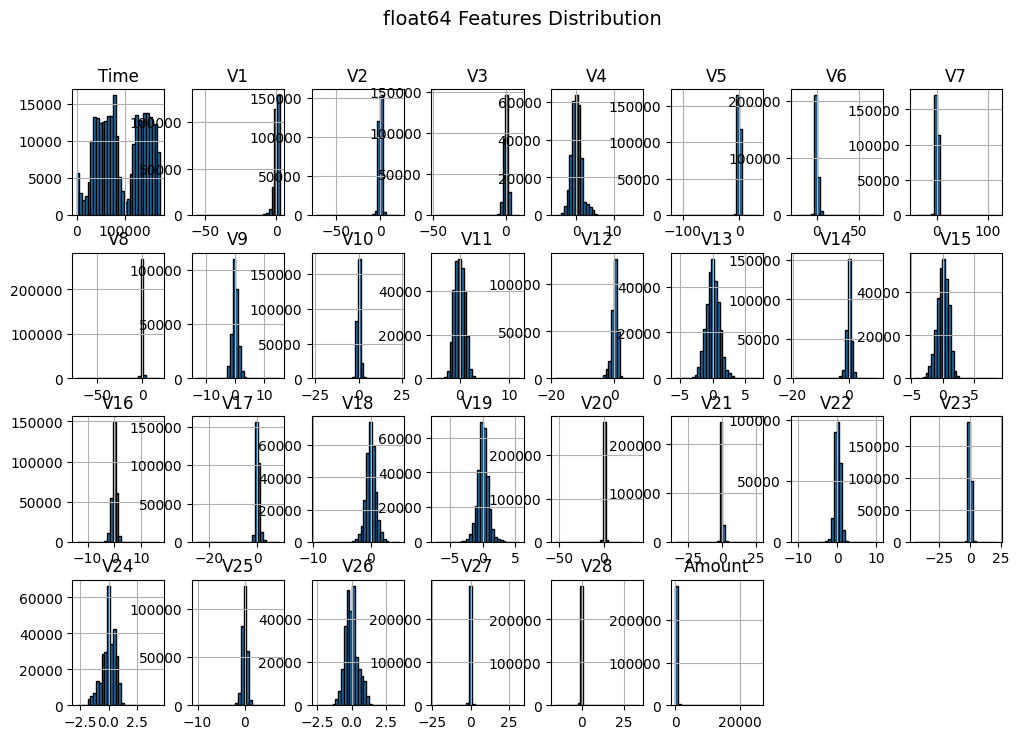

In [38]:
#lets make some visualizations 
#Here is the visualization for the float64 features.
# Visualizing only the float64 features
int_columns = df.select_dtypes(include=['float64']).columns.tolist()

# Plot float64 features
df[int_columns].hist(bins=30, edgecolor='black', layout=(4, 8), figsize=(12, 8))
plt.suptitle("float64 Features Distribution", fontsize=14)
plt.show()



## Data Preprocessing

Now that we have explored and visualized the dataset, the next step is **data preprocessing** to ensure data quality before building models. This includes:

1. **Handling Missing Values** – Identify and manage any missing or null values.
2. **Dealing with Outliers** – Address extreme values that could affect model performance.
3. **Feature Scaling** – Normalize or standardize numerical features if necessary.
4. **Handling Class Imbalance** – Apply techniques such as oversampling, undersampling, or SMOTE if needed.

Let's start with handling missing values.


In [20]:
# Check missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

# Check if there are any hidden missing values (like empty strings)
print((df == "").sum())  # Count empty strings
print(df.isin(["NA", "N/A", "null", "None"]).sum())  # Count special missing indicators


Missing Values:
 Series([], dtype: int64)
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [21]:
#Dealing with Outliers 
# Function to detect outliers using IQR
def detect_outliers(df, columns):
    outlier_counts = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    return outlier_counts

# Detect outliers in float and integer columns
outliers = detect_outliers(df, float_columns + int_columns)
print("Outlier counts per column:", outliers)



Outlier counts per column: {'Time': 0, 'V1': 7062, 'V2': 13526, 'V3': 3363, 'V4': 11148, 'V5': 12295, 'V6': 22965, 'V7': 8948, 'V8': 24134, 'V9': 8283, 'V10': 9496, 'V11': 780, 'V12': 15348, 'V13': 3368, 'V14': 14149, 'V15': 2894, 'V16': 8184, 'V17': 7420, 'V18': 7533, 'V19': 10205, 'V20': 27770, 'V21': 14497, 'V22': 1317, 'V23': 18541, 'V24': 4774, 'V25': 5367, 'V26': 5596, 'V27': 39163, 'V28': 30342, 'Amount': 31904, 'Class': 492}


# Key Observations  

- Many columns have a significant number of outliers, especially:  
  - **V8**: 24,134 outliers  
  - **V20**: 27,770 outliers  
  - **V27**: 39,163 outliers  
  - **V28**: 30,342 outliers  
  - **Amount**: 31,904 outliers  

- The **"Class"** column has 492 outliers, but this is expected because it represents fraudulent transactions, which are rare by nature.  

- The **"Time"** column has no outliers, which makes sense since it represents sequential transaction times.  

# What Should We Do Next?  

Handling outliers depends on their impact on the model:  

## Option 1: Keep the Outliers  
- Since this dataset is based on real-world financial transactions, many of these outliers might be **important patterns for detecting fraud**.  
- Removing them could lead to **data loss**, which might reduce the model's ability to detect fraudulent transactions.  
- If the fraud cases mostly exist in these extreme values, keeping them is the best approach.  

## Option 2: Cap the Outliers (Winsorizing)  
- Instead of removing outliers, we can **cap extreme values** at a reasonable threshold.  
- **Example**: Replace values above the **99th percentile** with the 99th percentile value.  

## Option 3: Standardization or Log Transformation  
- Since features **V1 to V28** come from **PCA transformation**, their outliers might not be real anomalies but just **extreme PCA components**.  
- Instead of removing them, we can **scale or normalize** them using **StandardScaler** or **MinMaxScaler**.  
- The **Amount** column might benefit from **log transformation** to reduce its skewness.  

# Next Steps  
- **Check how many outliers belong to the fraud class** to see if they are important for fraud detection.  
- **Visualize some key features with boxplots** to better understand their distributions.  
- **Decide whether to keep, cap, or transform the outliers** based on their impact.  


In [22]:
# Function to count outliers in each column for fraudulent transactions
def count_fraud_outliers(df, columns):
    fraud_outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        fraud_outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound) & (df["Class"] == 1)].shape[0]
    return fraud_outliers

# Count outliers that belong to fraud class
fraud_outliers_count = count_fraud_outliers(df, float_columns + int_columns)
print("Number of fraud cases that are outliers per column:", fraud_outliers_count)


Number of fraud cases that are outliers per column: {'Time': 0, 'V1': 7062, 'V2': 8660, 'V3': 3343, 'V4': 2561, 'V5': 3908, 'V6': 1768, 'V7': 4818, 'V8': 12416, 'V9': 2441, 'V10': 3372, 'V11': 413, 'V12': 14579, 'V13': 1142, 'V14': 8758, 'V15': 2465, 'V16': 6531, 'V17': 796, 'V18': 4000, 'V19': 5173, 'V20': 8826, 'V21': 6635, 'V22': 942, 'V23': 8249, 'V24': 4638, 'V25': 3714, 'V26': 739, 'V27': 19805, 'V28': 18720, 'Amount': 91, 'Class': 492}


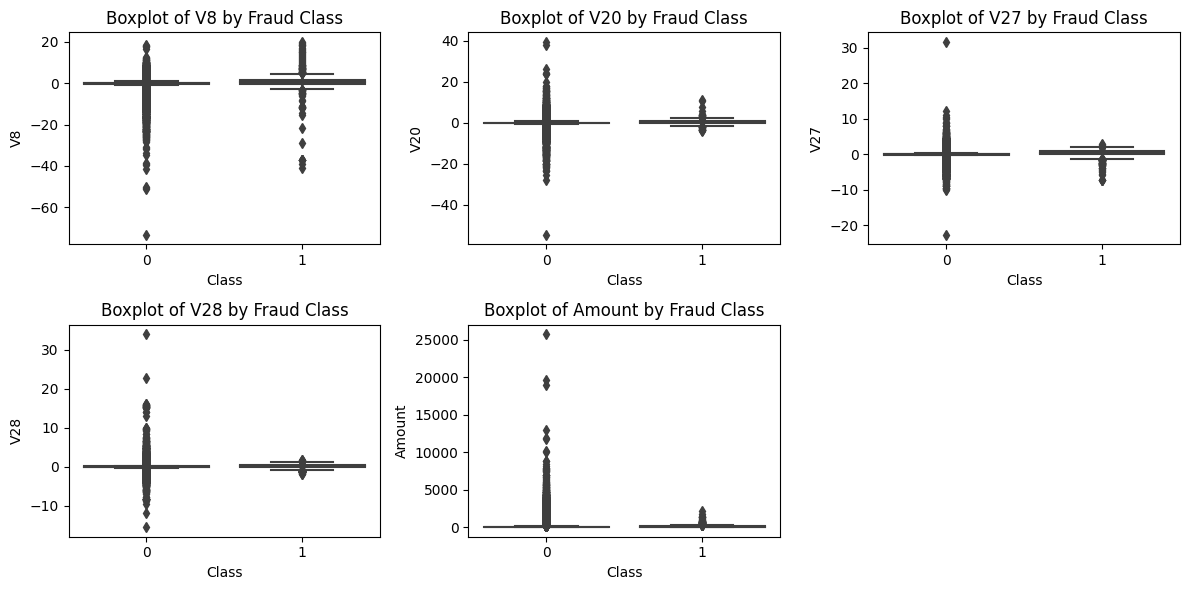

In [23]:
# Select key columns with many outliers
key_features = ["V8", "V20", "V27", "V28", "Amount"]

# Create boxplots for each key feature
plt.figure(figsize=(12, 6))
for i, col in enumerate(key_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df["Class"], y=df[col])
    plt.title(f"Boxplot of {col} by Fraud Class")
plt.tight_layout()
plt.show()


Outliers appear in non-fraud (Class = 0) cases in four plots.and only 
In one plot the outliers in fraund (class = 1), outliers are mostly in fraud cases.
What This Means:
Outliers in non-fraud cases (Class = 0) → These could be normal variations in real-world transactions. Removing them might help reduce noise.
Outliers in fraud cases (Class = 1) → If fraud transactions mostly exist in the extreme values, then these outliers contain useful fraud detection patterns. Removing them could weaken the model.
Best Approach:
 Keep outliers for fraud transactions. Since one plot shows fraud cases in extreme values, these are likely important fraud signals.
 Handle outliers in non-fraud transactions. We can either cap them (winsorization) or standardize them to prevent the model from learning misleading patterns.

In [39]:
from sklearn.preprocessing import RobustScaler

# Select numeric features for scaling
columns_to_scale = ["Time", "Amount"]  # Only scaling these since V1-V28 are PCA components

# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Check the transformed data
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [58]:
scaler = StandardScaler()
X_resampled[["Time", "Amount"]] = scaler.fit_transform(X_resampled[["Time", "Amount"]])
print(" Amount and Time are handled using StandardScaler.")


 Amount and Time are handled using StandardScaler.


In [59]:
df[["Time", "Amount"]].describe()

,Time,Amount
count,284807.000000,284807.000000
mean,0.118914,0.927124
std,0.557903,3.495006
min,-0.994983,-0.307413
25%,-0.358210,-0.229162
50%,0.000000,0.000000
75%,0.641790,0.770838
max,1.035022,358.683155


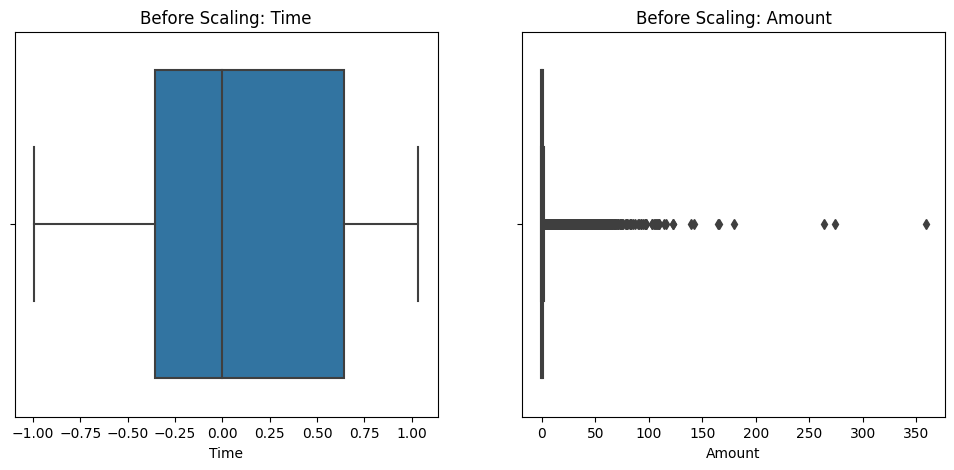

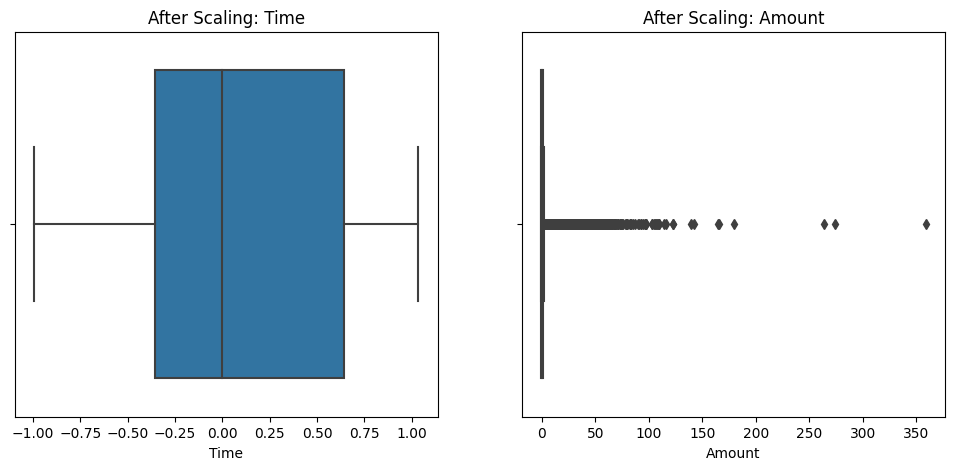

In [60]:
#Visualizing the Effect of RobustScaler on "Time" and "Amount"
# Plot original distributions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Time"])
plt.title("Before Scaling: Time")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Amount"])
plt.title("Before Scaling: Amount")

# After Scaling
# Plot distributions after scaling
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df["Time"])
plt.title("After Scaling: Time")

plt.subplot(1, 2, 2)
sns.boxplot(x=df["Amount"])
plt.title("After Scaling: Amount")

plt.show()


RobustScaler does not eliminate outliers—it just reduces their influence by scaling based on the median and IQR instead of the mean and standard deviation. If the boxplots look similar, that means **the extreme values are still present, but their effect on the model is minimized**.

In [30]:
from imblearn.over_sampling import SMOTE

# Define features and target variable
X = df.drop(columns=["Class"])
y = df["Class"]

# Apply SMOTE with 100% oversampling (Fraud cases = Non-Fraud cases)
smote = SMOTE(sampling_strategy=1.0, random_state=42)  
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts(normalize=True) * 100)  # Show percentages



Class distribution after SMOTE:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


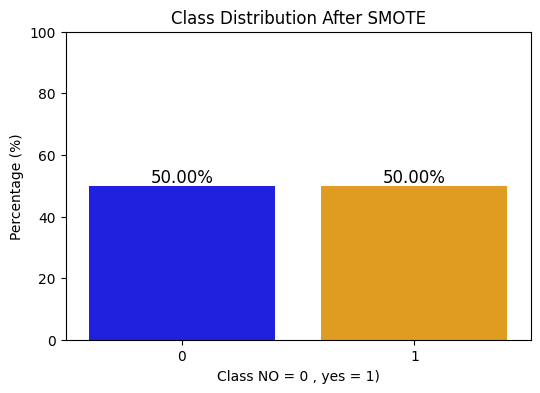

In [31]:
# Plot class distribution after SMOTE
plt.figure(figsize=(6, 4))
sns.barplot(x=y_resampled.value_counts().index, 
            y=y_resampled.value_counts(normalize=True) * 100, 
            palette=["blue", "orange"])

plt.xlabel("Class NO = 0 , yes = 1)")
plt.ylabel("Percentage (%)")
plt.title("Class Distribution After SMOTE")
plt.ylim(0, 100)

# Show values on bars
for i, v in enumerate(y_resampled.value_counts(normalize=True) * 100):
    plt.text(i, v + 1, f"{v:.2f}%", ha="center", fontsize=12)

plt.show()


In [36]:
#Checking for Constant or Duplicate Columns
constant_columns = [col for col in X_resampled.columns if X_resampled[col].nunique() == 1]
print("Constant columns:", constant_columns)


Constant columns: []


## ** Model Selection and Training**
To ensure the best model performance, we will test three models:
- **Logistic Regression (LR)**: A simple linear model for baseline performance.
- **Random Forest (RF)**: A tree-based ensemble model that handles outliers well.
- **XGBoost**: A powerful gradient boosting algorithm, often used for fraud detection.

---

## ** Train-Test Split**
Before training, we will split the dataset into:
- **Training Set** (80%): Used to train the models.
- **Test Set** (20%): Used to evaluate performance on unseen data.

We will use **stratified splitting** to maintain the class balance.


In [44]:
from sklearn.model_selection import train_test_split
# Define features and target
X = df.drop(columns=["Class"])  # Features
y = df["Class"]  # Target

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check class distribution
print("Class distribution in training set:\n", y_train.value_counts(normalize=True))
print("Class distribution in test set:\n", y_test.value_counts(normalize=True))


Class distribution in training set:
 Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Class distribution in test set:
 Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [46]:
# Apply SMOTE only on the training set
smote = SMOTE(sampling_strategy=1.0, random_state=42)  
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print(y_train_resampled.value_counts(normalize=True))
# Check new class distribution
print("Class distribution after SMOTE:")
print(y_resampled.value_counts(normalize=True) * 100)  # Show percentages

Class
0    0.5
1    0.5
Name: proportion, dtype: float64
Class distribution after SMOTE:
Class
0    50.0
1    50.0
Name: proportion, dtype: float64


In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
# Set a fixed random state
random_state = 42

# Step 1: Initialize Models
models = {
    "Logistic Regression": LogisticRegression(random_state=random_state, max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=random_state, n_estimators=100),
    "XGBoost": XGBClassifier(random_state=random_state,n_estimators=100, use_label_encoder=False, eval_metric='logloss')
}

# Step 2: Train Models & Evaluate Recall
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    
    # Predictions
    y_pred = model.predict(X_test)
    
    # Metrics
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred, digits=4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("-" * 60)


Training Logistic Regression...

Logistic Regression Performance:
              precision    recall  f1-score   support

           0     0.9999    0.9748    0.9872     56864
           1     0.0591    0.9184    0.1110        98

    accuracy                         0.9747     56962
   macro avg     0.5295    0.9466    0.5491     56962
weighted avg     0.9982    0.9747    0.9857     56962

Confusion Matrix:
 [[55431  1433]
 [    8    90]]
------------------------------------------------------------
Training Random Forest...

Random Forest Performance:
              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8632    0.8367    0.8497        98

    accuracy                         0.9995     56962
   macro avg     0.9314    0.9183    0.9247     56962
weighted avg     0.9995    0.9995    0.9995     56962

Confusion Matrix:
 [[56851    13]
 [   16    82]]
------------------------------------------------------------
Trai

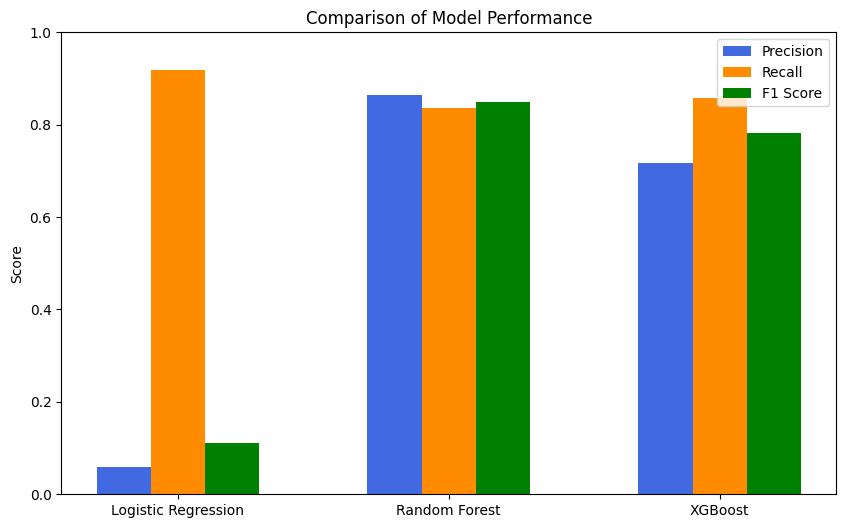

In [50]:
#lets visualize the three models performance
# Model names
models = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Metrics from previous results (update based on your actual values)
precision = [0.0591, 0.8632, 0.7179]  # Example values
recall = [0.9184, 0.8367, 0.8571]
f1_score = [0.1110, 0.8497, 0.7814]

# Bar plot for Precision, Recall, and F1-score
plt.figure(figsize=(10, 6))
x = np.arange(len(models))
width = 0.2  # Bar width

plt.bar(x - width, precision, width, label='Precision', color='royalblue')
plt.bar(x, recall, width, label='Recall', color='darkorange')
plt.bar(x + width, f1_score, width, label='F1 Score', color='green')

plt.xticks(x, models)
plt.ylabel('Score')
plt.title('Comparison of Model Performance')
plt.legend()
plt.ylim(0, 1)  # All values between 0 and 1
plt.show()

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Fraud', 'Fraud'], yticklabels=['No Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Example: Replace y_test and y_pred_xgb with your actual test labels and predictions
# plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression")
# plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
# plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")



**#after visualization the best model is xgboost (because we target high recall but not a very bad precision)#lets optimize it tring to improve recall & precision balance.Hyperparameter Tuning with RandomizedSearchCVThis code will:Optimize n_estimators, max_depth, learning_rate, scale_pos_weight, and gamma.Use Recall as the scoring metric (to maximize fraud detection).Apply 5-fold cross-validation for stability.Use early stopping to prevent overfitting.**


In [51]:
#Now, let’s tune hyperparameters to push recall closer to 90% while maintaining good precision.
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import recall_score

# Define XGBoost model
xgb = XGBClassifier(objective="binary:logistic", eval_metric="logloss", use_label_encoder=False)

# Hyperparameter search space
param_dist = {
    "n_estimators": [100, 200, 300, 500],  # Number of trees
    "max_depth": [3, 5, 7, 9],  # Depth of trees
    "learning_rate": [0.01, 0.05, 0.1, 0.2],  # Step size shrinkage
    "gamma": [0, 0.1, 0.3, 0.5],  # Regularization parameter
    "scale_pos_weight": [1, len(y_train[y_train == 0]) / len(y_train[y_train == 1])]  # Balance fraud cases
}

# Randomized Search with Cross Validation
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    scoring="recall",  # Maximizing recall
    cv=5,  # 5-fold cross-validation
    n_iter=20,  # Number of random combinations to try
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit model
random_search.fit(X_train, y_train)

# Get best parameters
best_params = random_search.best_params_
print("Best Parameters:", best_params)

# Train final XGBoost model with best parameters
best_xgb = XGBClassifier(**best_params, objective="binary:logistic", eval_metric="logloss", use_label_encoder=False)
best_xgb.fit(X_train, y_train)

# Evaluate on test set
y_pred = best_xgb.predict(X_test)
recall = recall_score(y_test, y_pred)
print("Final Model Recall:", recall)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'scale_pos_weight': 577.2868020304569, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 0.1}
Final Model Recall: 0.8979591836734694


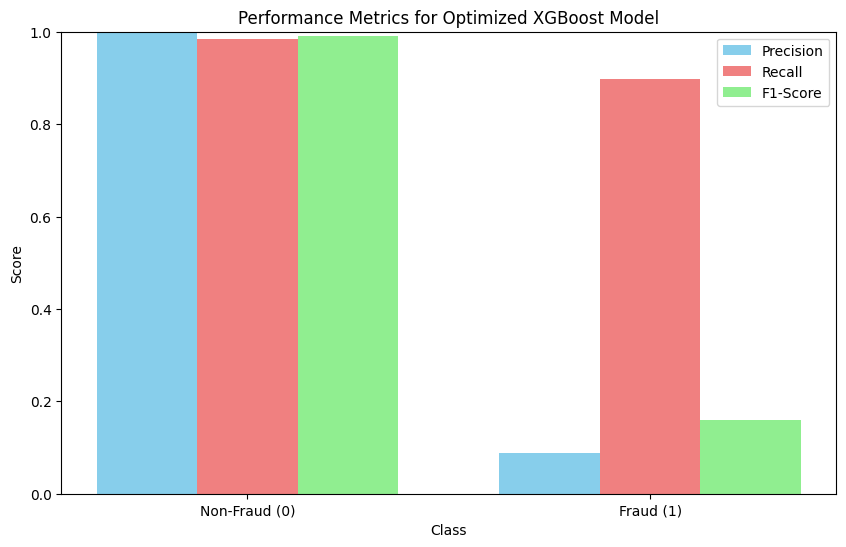

In [54]:
# Get predictions
y_pred = best_xgb.predict(X_test)

# Get classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Extract precision, recall, and F1-score for each class
labels = ['Non-Fraud (0)', 'Fraud (1)']
precision = [report['0']['precision'], report['1']['precision']]
recall = [report['0']['recall'], report['1']['recall']]
f1_score = [report['0']['f1-score'], report['1']['f1-score']]

# Plot
metrics = ['Precision', 'Recall', 'F1-Score']
values = [precision, recall, f1_score]
colors = ['skyblue', 'lightcoral', 'lightgreen']

plt.figure(figsize=(10, 6))

for i in range(3):
    plt.bar(np.arange(len(labels)) + i * 0.25, values[i], width=0.25, label=metrics[i], color=colors[i])

plt.xticks(np.arange(len(labels)) + 0.25, labels)
plt.xlabel('Class')
plt.ylabel('Score')
plt.title('Performance Metrics for Optimized XGBoost Model')
plt.legend()
plt.ylim(0, 1)
plt.show()

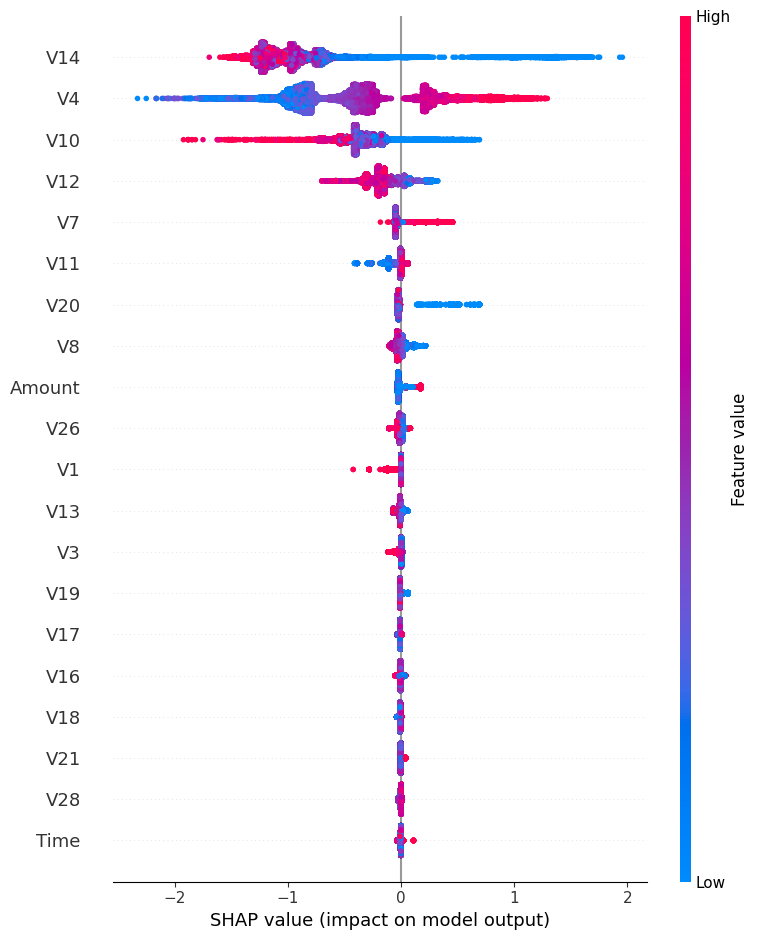

In [53]:
import shap
# Initialize SHAP explainer
explainer = shap.Explainer(best_xgb)  # Assuming 'best_xgb' is your trained XGBoost model
shap_values = explainer(X_test)  # Compute SHAP values for test data

# Summary Plot: Shows the impact of each feature on predictions
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test)

# Force Plot (Example for a single fraud case)
fraud_case = X_test.iloc[0]  # Select a fraud transaction (change index as needed)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0].values, fraud_case)

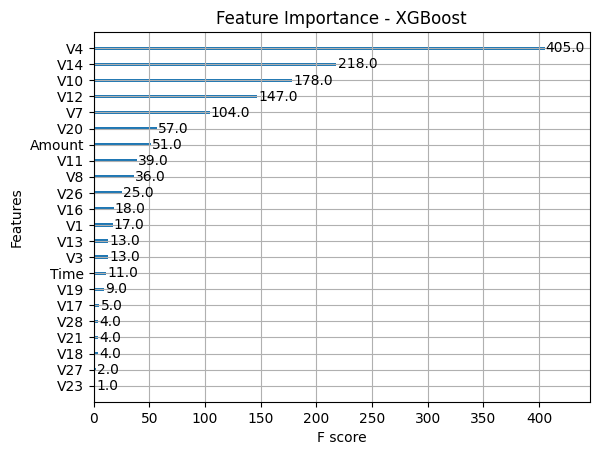

In [57]:
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(best_xgb)
plt.title("Feature Importance - XGBoost")
plt.show()


In [63]:
import joblib

# Save the trained model
joblib.dump(best_xgb, "xgboost_fraud_detection.pkl")

['xgboost_fraud_detection.pkl']

In [64]:
import os
print(os.listdir("/kaggle/working/"))


['xgboost_fraud_detection.pkl', '.virtual_documents']
